In [6]:
import numpy as np
import utils
import time
import numba
from acs import AntColonySystem


In [2]:
def one_mat_run_test(matrix):
    prd_list = []
    time_list = []
    for b in range(50,210,10):
        avg_prd_list = []
        avg_time_list = []
        for i in range(30):
            ant_colony = AntColonySystem(costs_matrix=matrix,num_Iter=b)
            start = time.time()
            tour, length = ant_colony.find_tour()
            end = time.time()
            avg_time_list.append(end-start)
            avg_prd_list.append(utils.prd(length, utils.best_dict[cities]))
        avg_prd = round(sum(avg_prd_list)/len(avg_prd_list), 2)
        avg_time = round(sum(avg_time_list)/len(avg_time_list), 2)
        prd_list.append(avg_prd)
        time_list.append(avg_time)
        print(b, end=" ")
    return prd_list, time_list

In [3]:
def run_test(**kwargs):  
    prd_list = []
    time_list = []
    for cities in utils.best_dict.keys():
        avg_prd_list = []
        avg_time_list = []
        for i in range(30):
            ant_colony = AntColonySystem(costs_matrix=utils.read_matrix(f'test/{cities}_test.txt'),**kwargs)
            start = time.time()
            tour, length = ant_colony.find_tour()
            end = time.time()
            avg_time_list.append(end-start)
            avg_prd_list.append(utils.prd(length, utils.best_dict[cities]))
        avg_prd = round(sum(avg_prd_list)/len(avg_prd_list), 2)
        avg_time = round(sum(avg_time_list)/len(avg_time_list), 2)
        prd_list.append(avg_prd)
        time_list.append(avg_time)
        print(cities, end=" ")
    return prd_list, time_list

In [ ]:
prd_list, time_list = run_test()

In [ ]:
prd_list

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## params defaults, number of ants 13 Time

Text(0, 0.5, 'Time [s]')

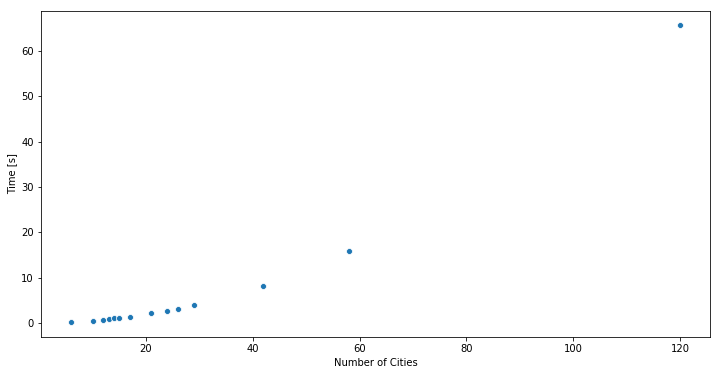

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = list(utils.best_dict.keys()), y = time_list)
plt.xlabel("Number of Cities")
plt.ylabel("Time [s]")

## param defaults. number of ants = 13 PRD

Text(0, 0.5, 'PRD [%]')

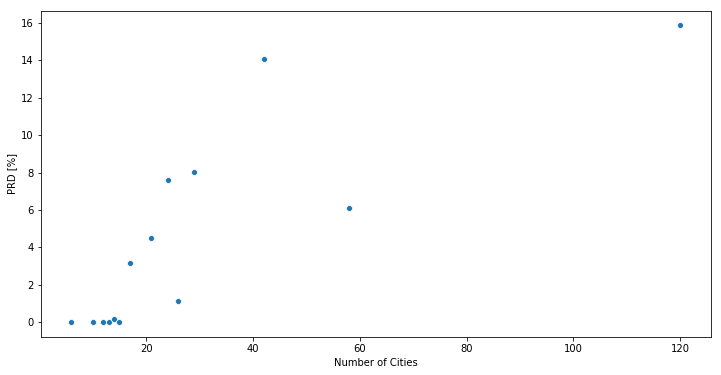

In [19]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = list(utils.best_dict.keys()), y = prd_list)
plt.xlabel("Number of Cities")
plt.ylabel("PRD [%]")

In [11]:
cities = 29
test_matrix =utils.read_matrix(f'test/{cities}_test.txt')

## test for number of ants

In [25]:
prd_list, time_list = one_mat_run_test(matrix=test_matrix)

5 6 7 8 9 10 11 12 13 14 

/home/mikita/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x432 with 0 Axes>

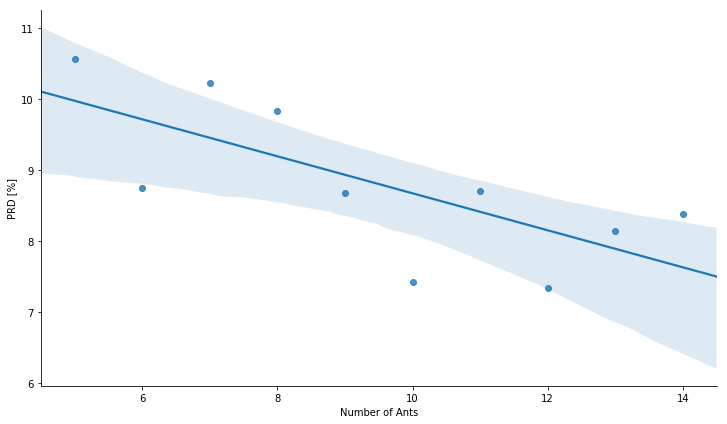

In [31]:
plt.figure(figsize=(12,6))
df = pd.DataFrame({'Number of Ants':list(range(5,15)) , 'PRD [%]':prd_list})
sns.lmplot(data = df,  x = ('Number of Ants'), y = ('PRD [%]'),height=6, aspect=1.7)

In [28]:
prd_list

[10.57, 8.75, 10.22, 9.83, 8.67, 7.42, 8.71, 7.33, 8.14, 8.38]

## test for alpha

In [20]:
prd_list, time_list = one_mat_run_test(matrix=test_matrix)

0.1 0.2 0.30000000000000004 0.4 0.5 0.6 0.7000000000000001 0.8 0.9 

/home/mikita/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x432 with 0 Axes>

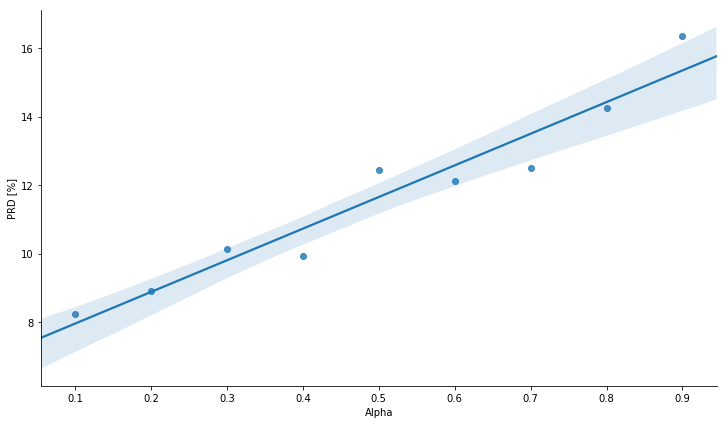

In [21]:
plt.figure(figsize=(12,6))
df = pd.DataFrame({'Alpha':list(np.arange(0.1, 1, 0.1)) , 'PRD [%]':prd_list})
sns.lmplot(data = df,  x = ('Alpha'), y = ('PRD [%]'),height=6, aspect=1.7)

In [12]:
prd_list, time_list = one_mat_run_test(matrix=test_matrix)

0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 

In [13]:
np.arange(0.5, 5, 0.5)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

/home/mikita/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x432 with 0 Axes>

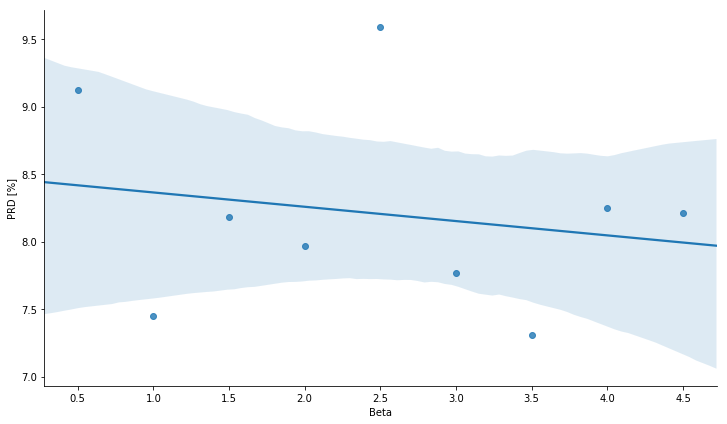

In [14]:
plt.figure(figsize=(12,6))
df = pd.DataFrame({'Beta':list(np.arange(0.5, 5, 0.5)) , 'PRD [%]':prd_list})
sns.lmplot(data = df,  x = ('Beta'), y = ('PRD [%]'),height=6, aspect=1.7)

# explore probability

In [21]:
 prd_list, time_list = one_mat_run_test(matrix=test_matrix)

0.1 0.2 0.30000000000000004 0.4 0.5 0.6 0.7000000000000001 0.8 0.9 

<Figure size 864x432 with 0 Axes>

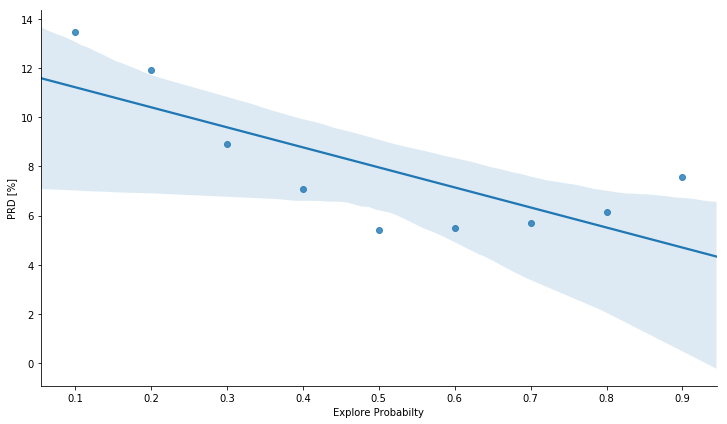

In [22]:
plt.figure(figsize=(12,6))
df = pd.DataFrame({'Explore Probabilty':list(np.arange(0.1, 1, 0.1)) , 'PRD [%]':prd_list})
sns.lmplot(data = df,  x = ('Explore Probabilty'), y = ('PRD [%]'),height=6, aspect=1.7)

Text(0, 0.5, 'PRD [%]')

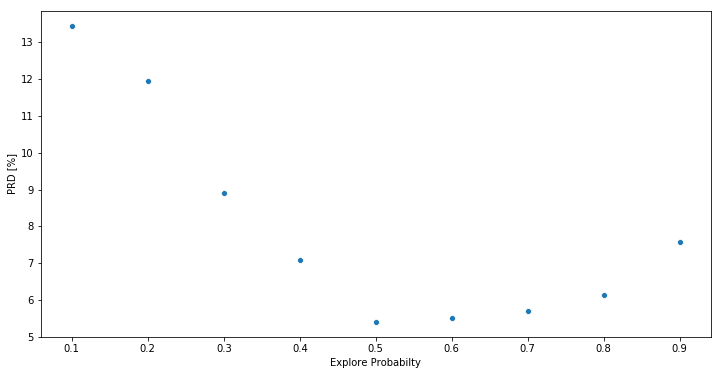

In [23]:
plt.figure(figsize=(12,6))
df = pd.DataFrame({'Explore Probabilty':list(np.arange(0.1, 1, 0.1)) , 'PRD [%]':prd_list})
sns.scatterplot(list(np.arange(0.1, 1, 0.1)), y = prd_list)
plt.xlabel('Explore Probabilty')
plt.ylabel('PRD [%]')

In [26]:
list(range(50,210,10))

[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

In [28]:
 prd_list, time_list = one_mat_run_test(matrix=test_matrix)

50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 

/home/mikita/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x432 with 0 Axes>

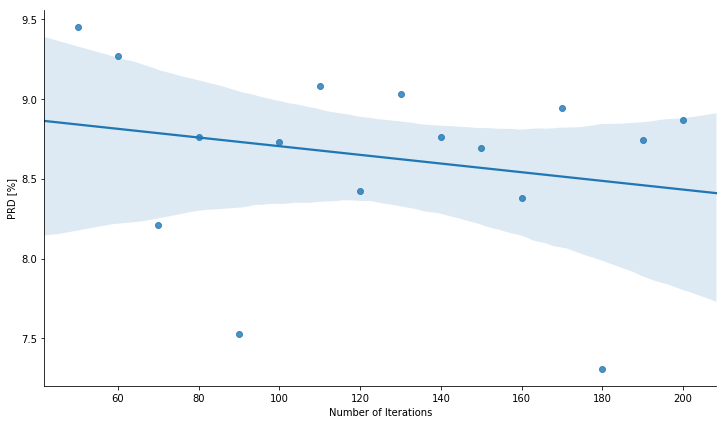

In [29]:
plt.figure(figsize=(12,6))
df = pd.DataFrame({'Number of Iterations':list(range(50,210,10)) , 'PRD [%]':prd_list})
sns.lmplot(data = df,  x = ('Number of Iterations'), y = ('PRD [%]'),height=6, aspect=1.7)

Text(0, 0.5, 'PRD [%]')

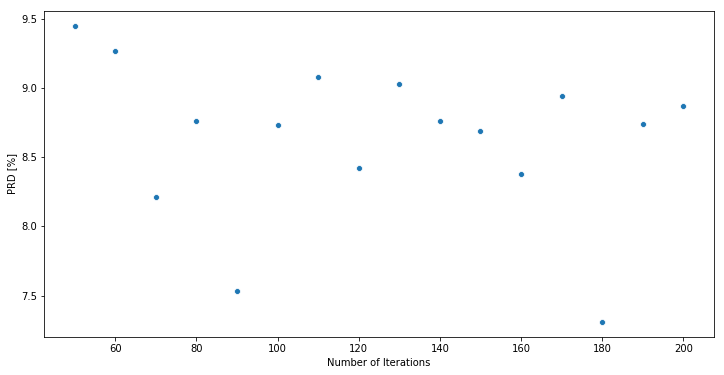

In [30]:
plt.figure(figsize=(12,6))
df = pd.DataFrame({'Number of Iterations':list(range(50,210,10)) , 'PRD [%]':prd_list})
sns.scatterplot(list(range(50,210,10)), y = prd_list)
plt.xlabel('Number of Iterations')
plt.ylabel('PRD [%]')

## test for instances

In [5]:
 prd_list, time_list = run_test(num_ants=10, alpha=0.1, num_Iter=100,explore_probability=0.9, beta=2)

6 10 12 13 14 15 17 21 24 26 29 42 58 120 

 prd_list, time_list = run_test(num_ants=10, alpha=0.1, num_Iter=120,explore_probability=0.7, beta=1)

Text(0, 0.5, 'Time [s]')

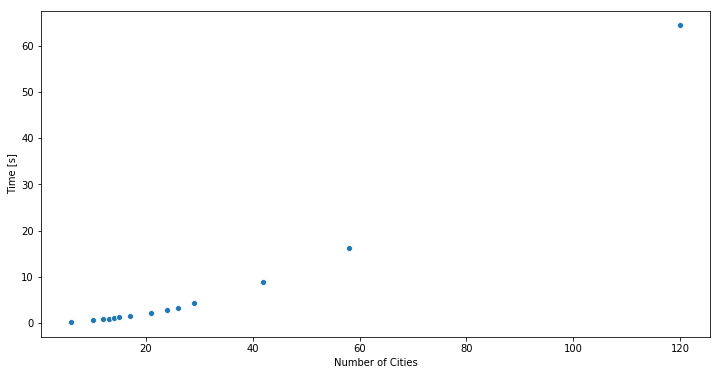

In [6]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = list(utils.best_dict.keys()), y = time_list)
plt.xlabel("Number of Cities")
plt.ylabel("Time [s]")

Text(0, 0.5, 'PRD [%]')

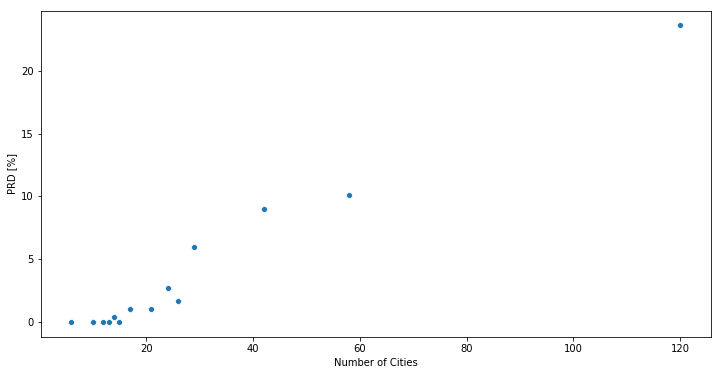

In [7]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = list(utils.best_dict.keys()), y = prd_list)
plt.xlabel("Number of Cities")
plt.ylabel("PRD [%]")

In [9]:
prd_list

[0.0, 0.0, 0.0, 0.0, 0.43, 0.0, 1.06, 1.0, 2.67, 1.7, 5.93, 8.99, 10.1, 23.6]

In [10]:
time_list

[0.18,
 0.53,
 0.77,
 0.88,
 1.05,
 1.17,
 1.41,
 2.07,
 2.81,
 3.28,
 4.29,
 8.78,
 16.16,
 64.49]

 prd_list, time_list = run_test(num_ants=10, alpha=0.1, num_Iter=100,explore_probability=0.9, beta=2)

Text(0, 0.5, 'Time [s]')

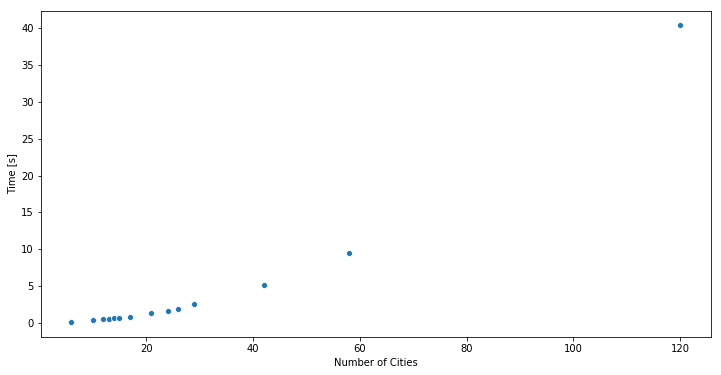

In [7]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = list(utils.best_dict.keys()), y = time_list)
plt.xlabel("Number of Cities")
plt.ylabel("Time [s]")

Text(0, 0.5, 'PRD [%]')

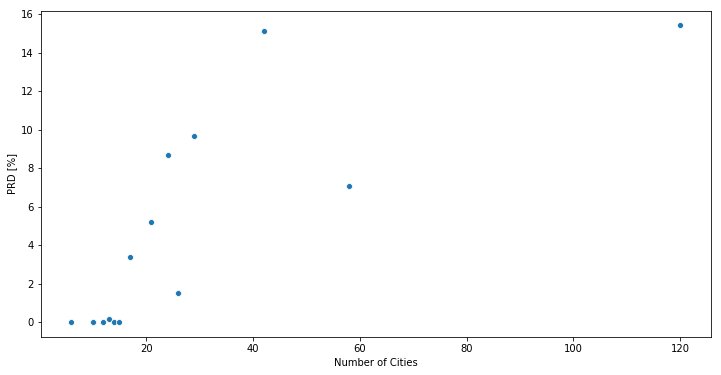

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = list(utils.best_dict.keys()), y = prd_list)
plt.xlabel("Number of Cities")
plt.ylabel("PRD [%]")

In [9]:
with open('ant_colony.txt', 'r') as f:
        len_timeline = [int(length.split('.')[0]) for length in f.readlines()]
len(len_timeline)

100

Text(0, 0.5, 'Length of the tour')

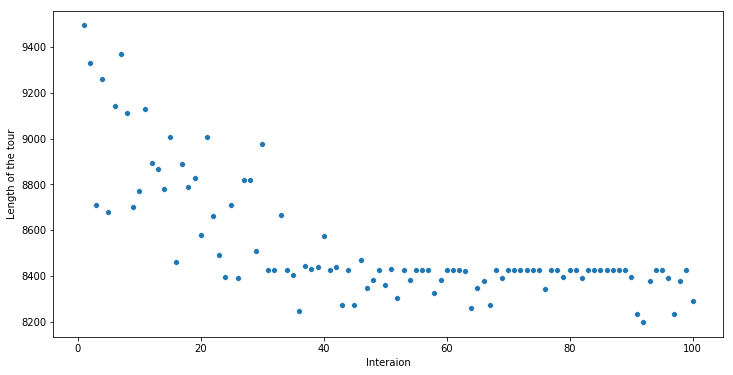

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = list(range(1,101)),  y=len_timeline) 
plt.xlabel('Interaion')
plt.ylabel('Length of the tour')